In [1]:
%pip install --quiet numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('uncleandata.csv')

1. How many rows are there ?

In [4]:
data.shape[0]

15099

2. How many columns are there ? What are they ?

In [5]:
print(f'The number of columns: {data.shape[1]}')
print('The columns are:')
for col in data.columns:
    print(f'- {col}')

The number of columns: 11
The columns are:
- satisfaction_level
- last_evaluation
- number_project
- average_montly_hours
- time_spend_company
- work_accident
- left
- promotion_last_5years
- is_smoker
- department
- salary


3. How many features? What are they ?

In [6]:
print(f'The number of features: {data.shape[1] - 1}')

print('The features are:')
for col in data.columns:
    if col != 'left':
        print(f'- {col}')

The number of features: 10
The features are:
- satisfaction_level
- last_evaluation
- number_project
- average_montly_hours
- time_spend_company
- work_accident
- promotion_last_5years
- is_smoker
- department
- salary


4. How many duplicates if any ?

In [7]:
duplicates_count = data.duplicated().sum()
print(f'The number of duplicate rows: {duplicates_count}')

The number of duplicate rows: 2840


5. Remove duplicates if there are any.

In [8]:
# Remove duplicates
data = data.drop_duplicates()

# Check if there are any duplicates left
print(f'The number of duplicate rows after removal: {data.duplicated().sum()}')
print(f'The number of rows after removing duplicates: {data.shape[0]}')

The number of duplicate rows after removal: 0
The number of rows after removing duplicates: 12259


6. Print the distributions of each features. What do you see?

Text(0, 0.5, 'Count')

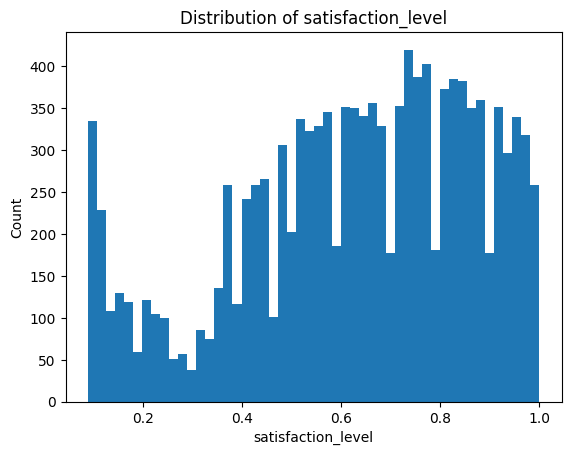

In [9]:
feature = 'satisfaction_level'
feature_plt = data[feature].plot(kind='hist', bins=50)
feature_plt.set_title(f'Distribution of {feature}')
feature_plt.set_xlabel(feature)
feature_plt.set_ylabel('Count')

Text(0, 0.5, 'Count')

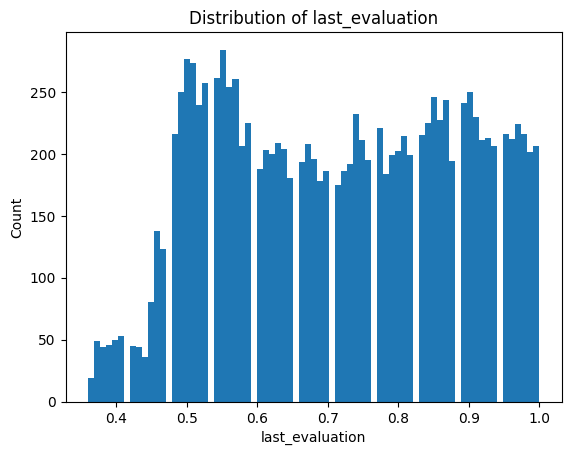

In [10]:
feature = 'last_evaluation'
feature_plt = data[feature].plot(kind='hist', bins=75)
feature_plt.set_title(f'Distribution of {feature}')
feature_plt.set_xlabel(feature)
feature_plt.set_ylabel('Count')

Text(0, 0.5, 'Count')

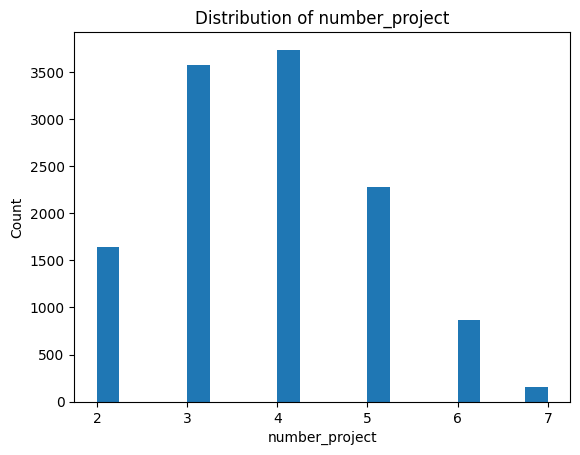

In [11]:
feature = 'number_project'
feature_plt = data[feature].plot(kind='hist', bins=20)
feature_plt.set_title(f'Distribution of {feature}')
feature_plt.set_xlabel(feature)
feature_plt.set_ylabel('Count')

Text(0, 0.5, 'Count')

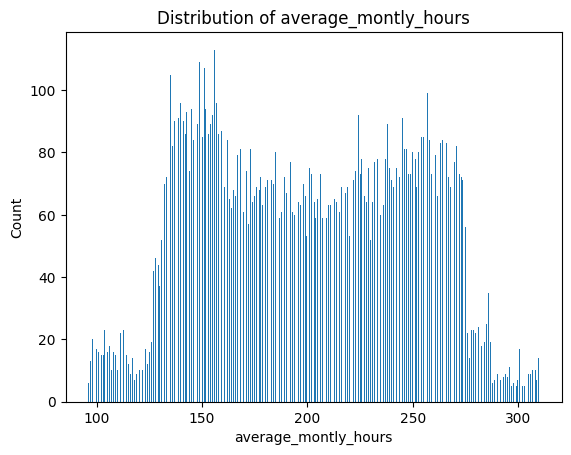

In [12]:
feature = 'average_montly_hours'
feature_plt = data[feature].plot(kind='hist', bins=500)
feature_plt.set_title(f'Distribution of {feature}')
feature_plt.set_xlabel(feature)
feature_plt.set_ylabel('Count')

Text(0, 0.5, 'Count')

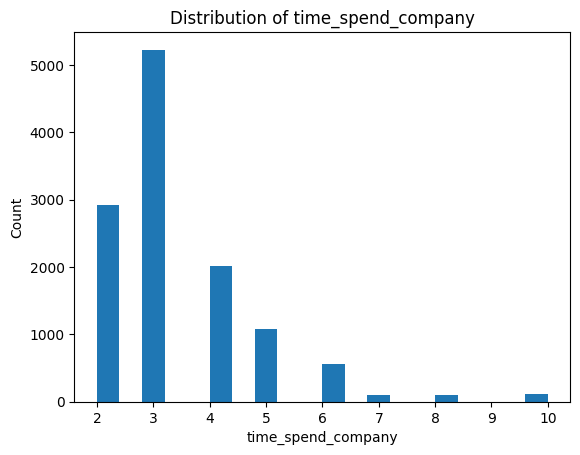

In [13]:
feature = 'time_spend_company'
feature_plt = data[feature].plot(kind='hist', bins=20)
feature_plt.set_title(f'Distribution of {feature}')
feature_plt.set_xlabel(feature)
feature_plt.set_ylabel('Count')

Text(0, 0.5, 'Count')

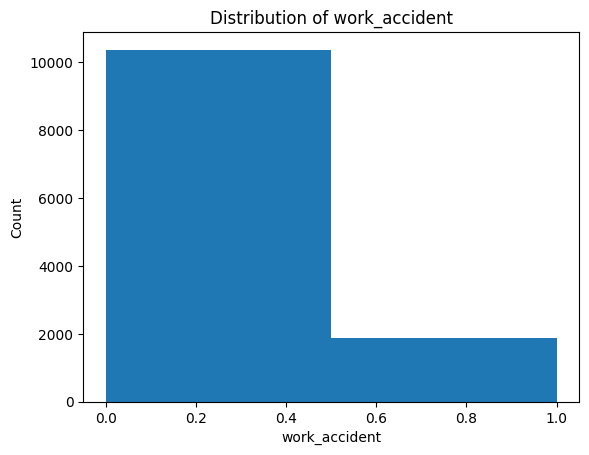

In [14]:
feature = 'work_accident'
feature_plt = data[feature].plot(kind='hist', bins=2)
feature_plt.set_title(f'Distribution of {feature}')
feature_plt.set_xlabel(feature)
feature_plt.set_ylabel('Count')

Text(0, 0.5, 'Count')

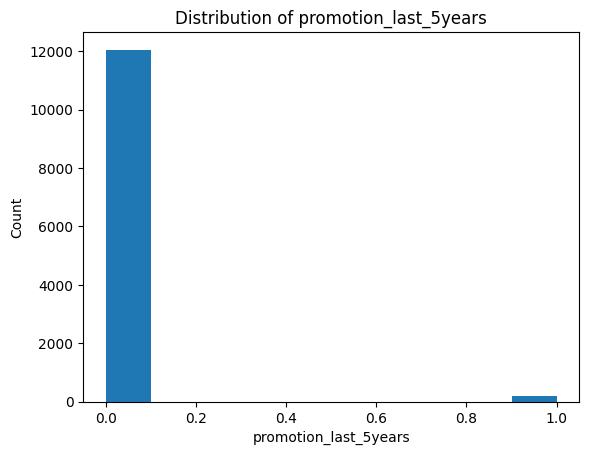

In [15]:
feature = 'promotion_last_5years'
feature_plt = data[feature].plot(kind='hist')
feature_plt.set_title(f'Distribution of {feature}')
feature_plt.set_xlabel(feature)
feature_plt.set_ylabel('Count')

Text(0, 0.5, 'Count')

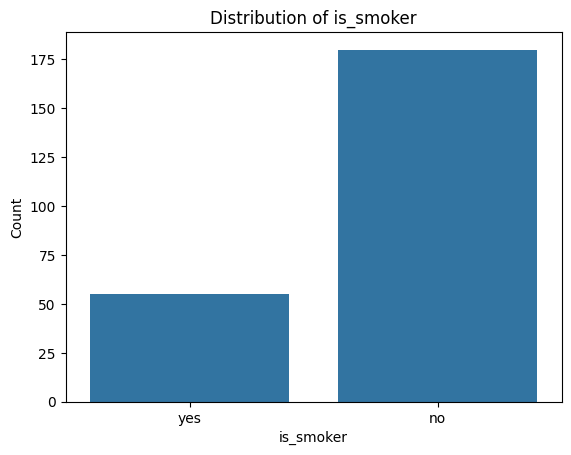

In [16]:
feature = 'is_smoker'
feature_plt = sns.countplot(x=data[feature])
feature_plt.set_title(f'Distribution of {feature}')
feature_plt.set_xlabel(feature)
feature_plt.set_ylabel('Count')

Text(0, 0.5, 'Count')

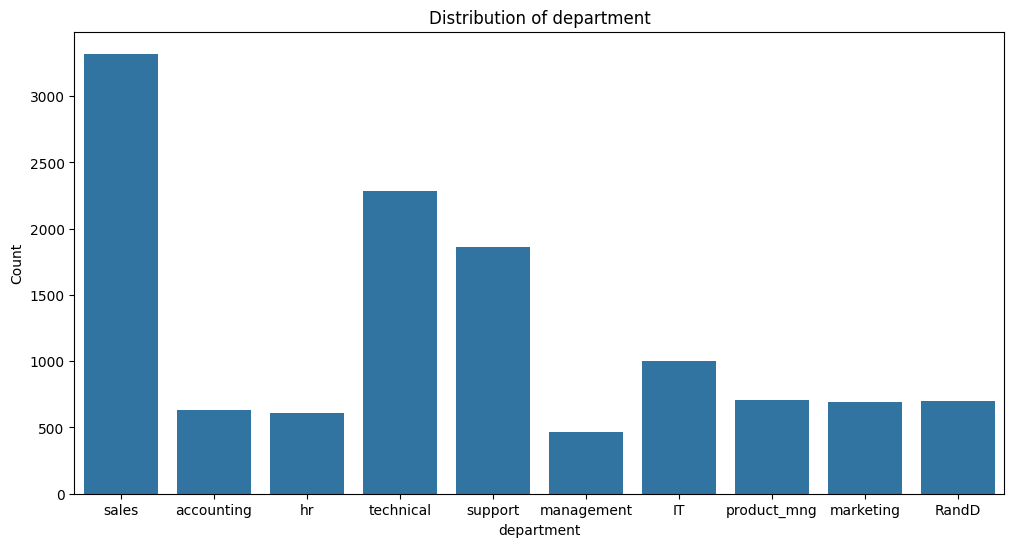

In [17]:
plt.figure(figsize=(12, 6))
feature = 'department'
feature_plt = sns.countplot(x=data[feature])
feature_plt.set_title(f'Distribution of {feature}')
feature_plt.set_xlabel(feature)
feature_plt.set_ylabel('Count')

Text(0, 0.5, 'Count')

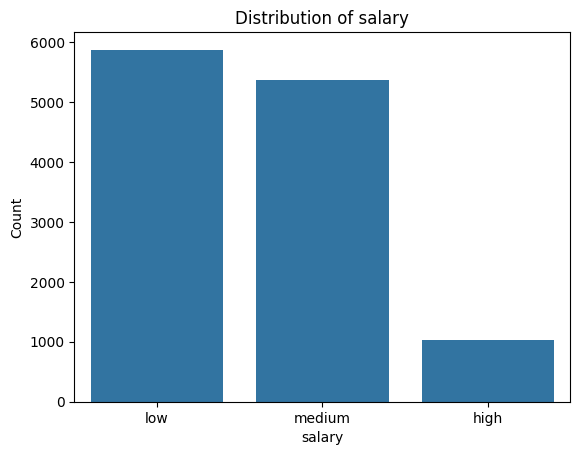

In [18]:
feature = 'salary'
feature_plt = sns.countplot(x=data[feature])
feature_plt.set_title(f'Distribution of {feature}')
feature_plt.set_xlabel(feature)
feature_plt.set_ylabel('Count')

7. How many missing values are there? What features have missing values ?

In [19]:
missing_values = data.isna().sum()
total_missing = missing_values.sum()
print(f'Total missing values in the dataset: {total_missing}')
print('Features with missing values:')
for col in missing_values[missing_values > 0].index:
    print(f'- {col}: {missing_values[col]} missing values')

Total missing values in the dataset: 12542
Features with missing values:
- average_montly_hours: 368 missing values
- time_spend_company: 150 missing values
- is_smoker: 12024 missing values


8. Drop the features with largest number of missing values and fill up the rest of the features with missing values with mean. Can you explain why did we drop the feature with largest portion of missing values in this case ?

In [20]:
# drop features with the largest number of missing values
feature_with_most_missing = missing_values.idxmax()
print(f'Feature with the most missing values: {feature_with_most_missing}')

# Drop the feature with the most missing values
clean_data = data.drop(columns=[feature_with_most_missing])

# fill the rest of the features with missing values with their mean
for col in clean_data.columns:
    if clean_data[col].isna().any():
        mean_value = clean_data[col].mean()
        clean_data[col] = clean_data[col].fillna(mean_value)
        print(f'Filled missing values in {col} with mean: {mean_value}')

# view the updated dataset
clean_data

Feature with the most missing values: is_smoker
Filled missing values in average_montly_hours with mean: 200.5117315616853
Filled missing values in time_spend_company with mean: 3.3800478982574944


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.000000,3.000000,0,yes,0,sales,low
1,0.80,0.86,5,262.000000,6.000000,0,yes,0,sales,medium
2,0.11,0.88,7,272.000000,4.000000,0,yes,0,sales,medium
3,0.72,0.87,5,223.000000,5.000000,0,yes,0,sales,low
4,0.37,0.52,2,200.511732,3.380048,0,yes,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14968,0.40,0.47,2,128.000000,3.000000,0,yes,0,sales,medium
14969,0.43,0.46,2,157.000000,3.000000,0,yes,0,sales,medium
14990,0.89,0.88,5,228.000000,5.000000,1,yes,0,support,low
14993,0.76,0.83,6,293.000000,6.000000,0,yes,0,support,low


9. Show that there are no missing values in the data at this point.

In [21]:
for col in clean_data.columns:
    if pd.api.types.is_numeric_dtype(clean_data[col]):
        print(f'{col}: {clean_data[col].isna().sum()}')


satisfaction_level: 0
last_evaluation: 0
number_project: 0
average_montly_hours: 0
time_spend_company: 0
work_accident: 0
promotion_last_5years: 0


10. Feature "left" has values 'yes' and 'no'. Convert those values into integer values, 1 and 0.

In [22]:
clean_data['left'] = clean_data['left'].map({'yes': 1, 'no': 0})
clean_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.000000,3.000000,0,1,0,sales,low
1,0.80,0.86,5,262.000000,6.000000,0,1,0,sales,medium
2,0.11,0.88,7,272.000000,4.000000,0,1,0,sales,medium
3,0.72,0.87,5,223.000000,5.000000,0,1,0,sales,low
4,0.37,0.52,2,200.511732,3.380048,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14968,0.40,0.47,2,128.000000,3.000000,0,1,0,sales,medium
14969,0.43,0.46,2,157.000000,3.000000,0,1,0,sales,medium
14990,0.89,0.88,5,228.000000,5.000000,1,1,0,support,low
14993,0.76,0.83,6,293.000000,6.000000,0,1,0,support,low


11. Save the resulting data into a file.

In [23]:
clean_data.to_csv('cleaned_data.csv', index=False)

12. What else do you observe in in this data set.

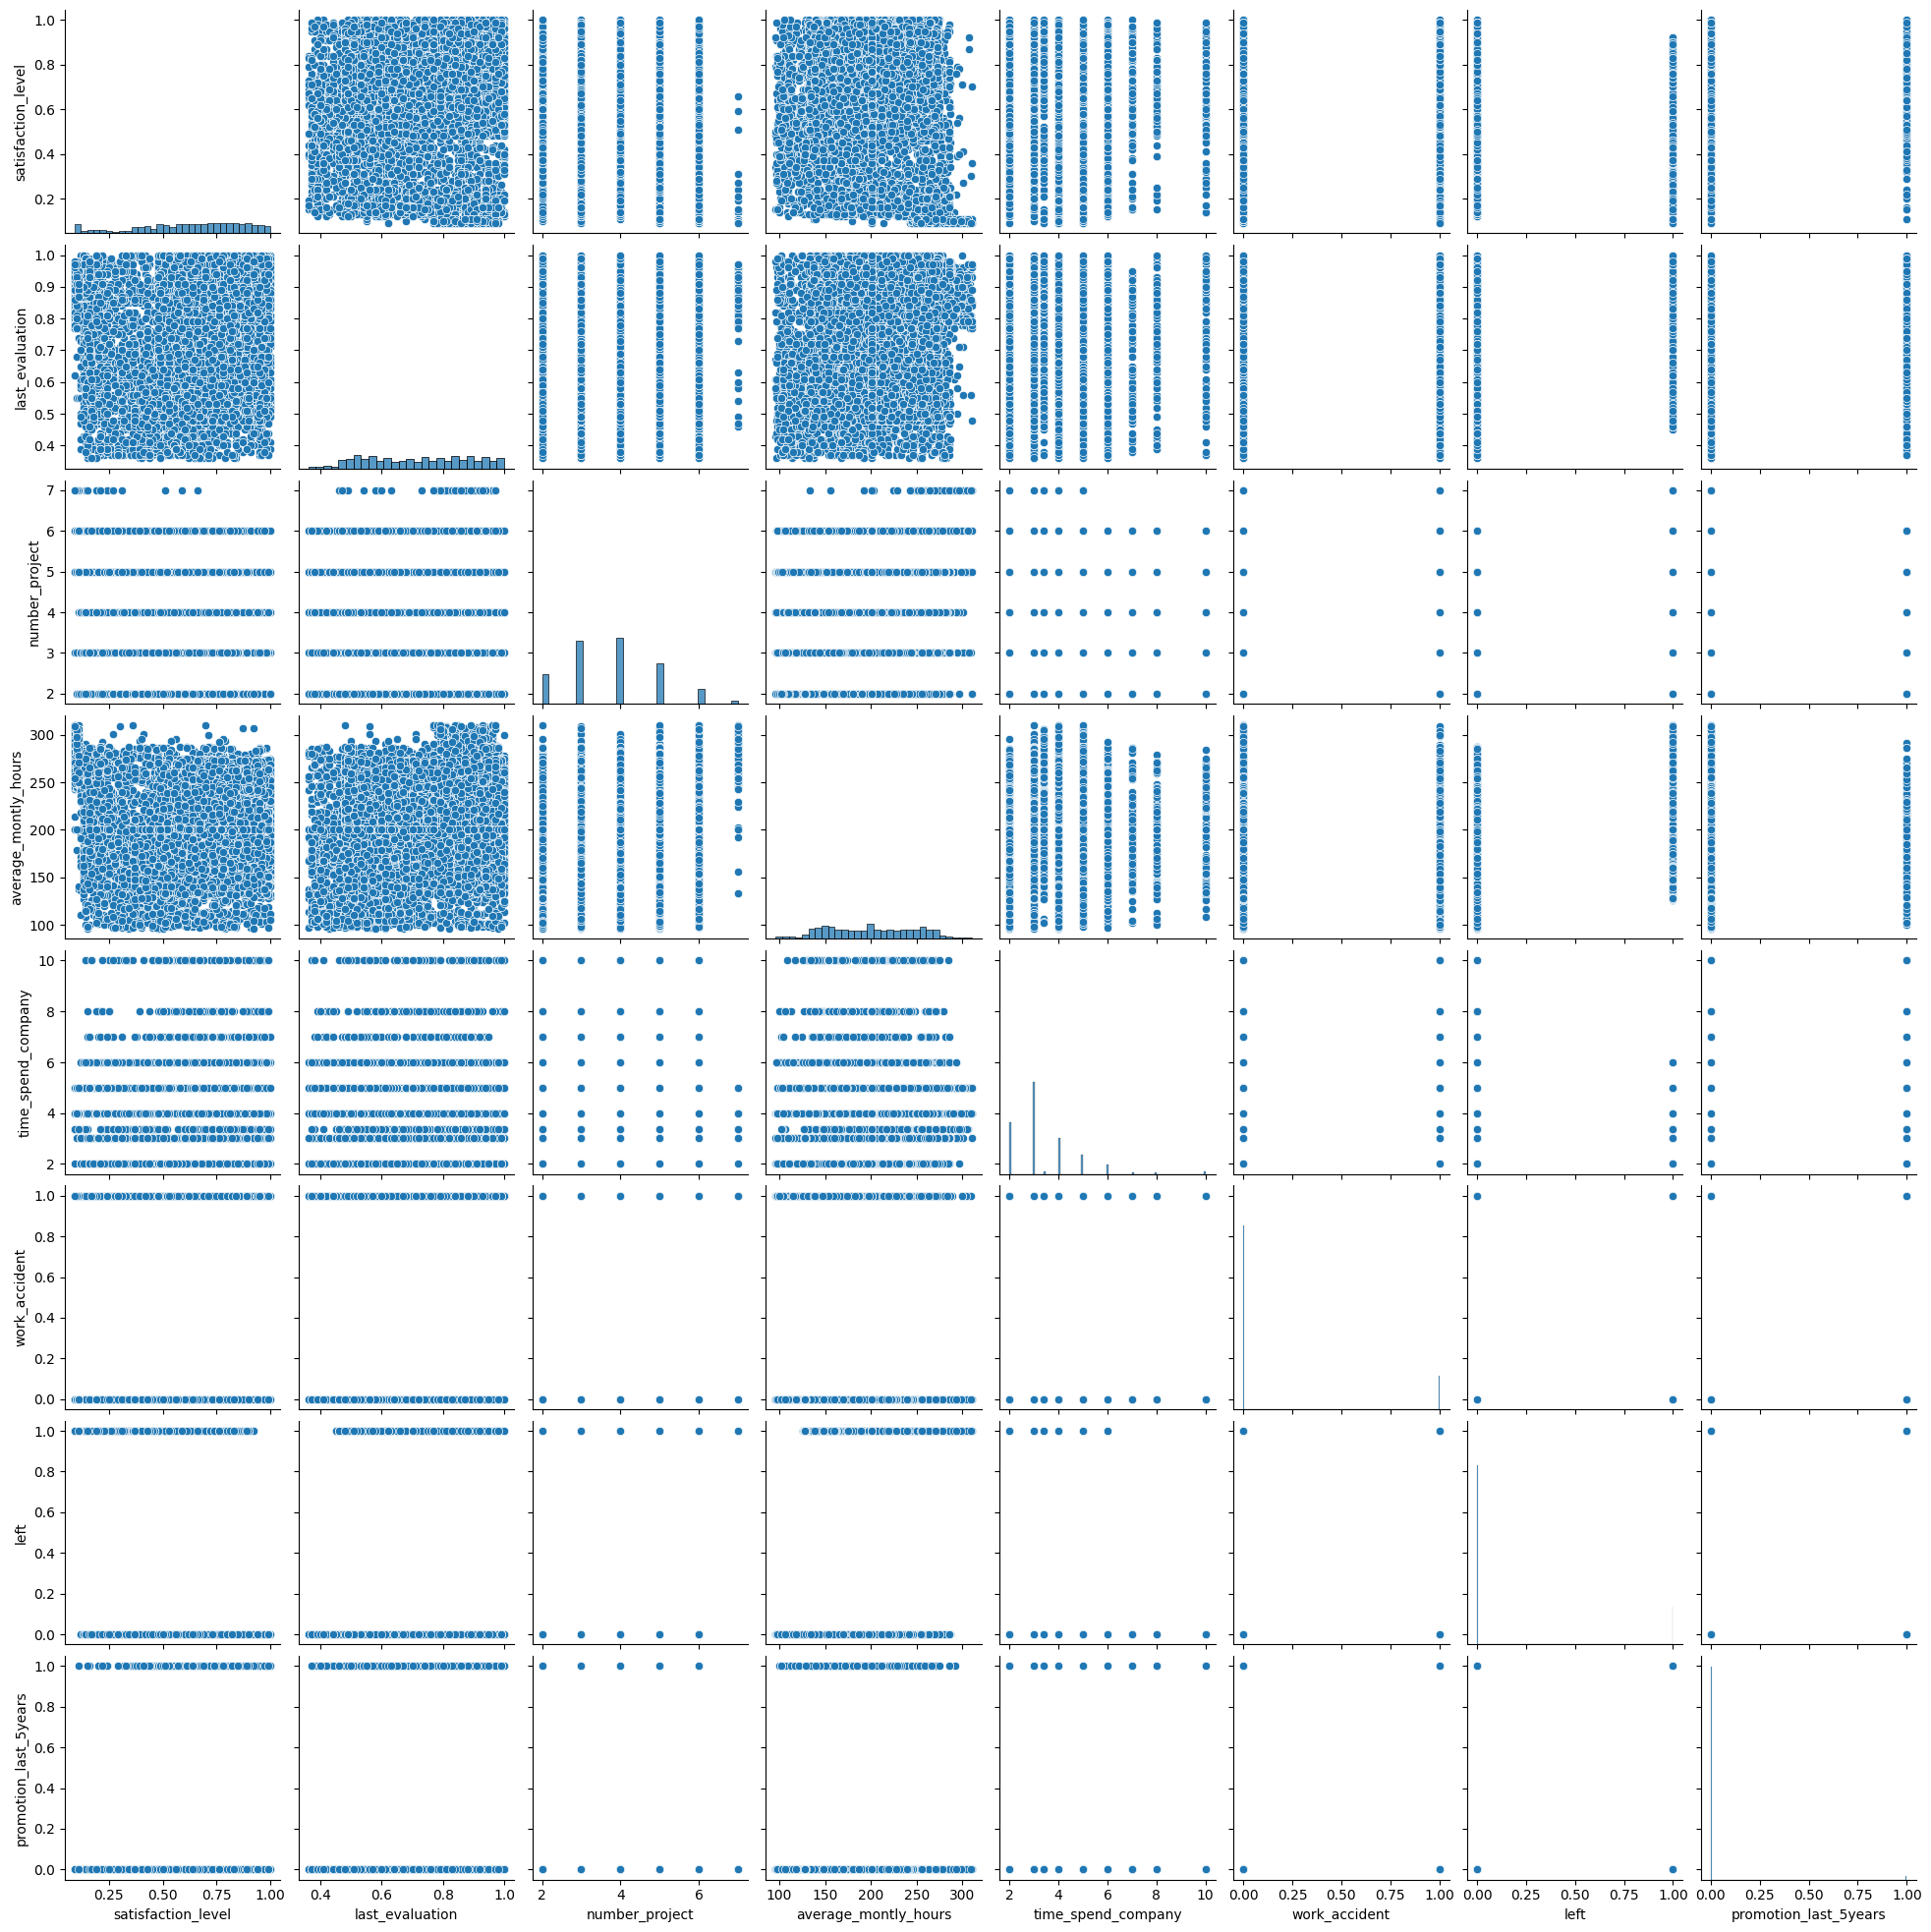

In [24]:
# what else do you observe in this data set

sns.pairplot(clean_data[clean_data.columns])

13. Divide the data into training set(80%) and test set(20%) and show the number of data points in each by following
    1. Uniform sampling
    2. Stratified sampling based on the ratio of "yes" and "no" values of feature "left"
    3. How would you do the test set and training set sampling and why ?

In [25]:
# uniform sampling
train_data_uniform, test_data_uniform = train_test_split(clean_data, test_size=0.2)

# Stratified sampling based on the ratio of "yes" and "no" values of feature "left"
strain_data_stratified, test_data_stratified = train_test_split(clean_data, test_size=0.2, stratify=clean_data['left'])